In [47]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import toml
from plotnine import aes, geom_point, ggplot, theme

In [48]:
# set paths and load data
path = pathlib.Path(
    "../../Data/clean/Plate2/nELISA_plate_430420_PBMC_cleanup4correlation.csv"
)
toml_path = pathlib.Path("../../../1.Exploratory_Data_Analysis/utils/params.toml")

df = pd.read_csv(path)
params = toml.load(toml_path)
list_of_treatments = params["list_of_treatments"]["treatments"]

In [49]:
df.head(3)

,Activin A [NSU],AITRL (GITR Ligand) [NSU],Amphiregulin [NSU],Amyloid beta [NSU],APRIL [NSU],BAFF [NSU],BCMA (TNFRSF17) [NSU],BDNF [NSU],BMP2 [NSU],BMP3 [NSU],...,VCAM-1 [NSU],VEGF Receptor 2 (Flk-1) [NSU],VEGF-A (165) [NSU],VEGF-C [NSU],VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU],Metadata_position_x,oneb_Metadata_Treatment_Dose_Inhibitor_Dose
0,0.097710,0.461685,0.270477,0.514695,0.479281,0.270494,0.708849,0.134432,0.350986,0.216932,...,0.395392,0.560129,0.504521,0.490444,0.258834,0.238358,0.524276,0.250670,B06,DMSO_0.100_DMSO_0.025
1,0.064513,0.451181,0.246274,0.471026,0.269795,0.204498,0.247611,0.322087,0.350642,0.349237,...,0.032391,0.476656,0.315426,0.589522,0.381170,0.168645,0.455092,0.228752,C06,DMSO_0.100_DMSO_0.025
2,0.061860,0.196318,0.236491,0.474891,0.174672,0.824721,0.704521,0.254823,0.443939,0.268677,...,0.486915,0.389375,0.369421,0.680276,0.182956,0.263281,0.213596,0.064645,I06,DMSO_0.100_DMSO_0.025


In [50]:
# get the columns with the treatment in treatment list
df_treatment = df[
    df["oneb_Metadata_Treatment_Dose_Inhibitor_Dose"].isin(list_of_treatments)
]
# drop the well column
df_treatment.drop(["Metadata_position_x"], axis=1, inplace=True)
# group by oneb_Metadata_Treatment_Dose_Inhibitor_Dose
df_treatment = df_treatment.groupby(
    "oneb_Metadata_Treatment_Dose_Inhibitor_Dose"
).mean()
df_treatment.reset_index(inplace=True)

/tmp/ipykernel_301182/4092445554.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [55]:
df_treatment[["TNF alpha [NSU]", "oneb_Metadata_Treatment_Dose_Inhibitor_Dose"]]

,TNF alpha [NSU],oneb_Metadata_Treatment_Dose_Inhibitor_Dose
0,0.010223,DMSO_0.100_DMSO_0.025
1,0.621895,Flagellin_0.100_DMSO_0.025
2,0.764270,Flagellin_1.000_DMSO_0.025
3,0.006434,H2O2_100.000_DMSO_0.025
4,0.864209,LPS_0.010_DMSO_0.025
5,0.845985,LPS_0.100_DMSO_0.025
6,0.898388,LPS_1.000_DMSO_0.025
7,0.896061,LPS_10.000_DMSO_0.025
8,0.898447,LPS_100.000_DMSO_0.025
9,0.676796,LPS_Nigericin_1.000_1.000_DMSO_0.025


/home/lippincm/miniconda3/envs/Interstellar/lib/python3.10/site-packages/mizani/palettes.py:706: UserWarning: Palette can return a maximum of 13 values. 17 values requested.
/home/lippincm/miniconda3/envs/Interstellar/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.
/home/lippincm/miniconda3/envs/Interstellar/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.
/home/lippincm/miniconda3/envs/Interstellar/lib/python3.10/site-packages/mizani/palettes.py:706: UserWarning: Palette can return a maximum of 13 values. 17 values requested.
/home/lippincm/miniconda3/envs/Interstellar/lib/python3.10/site-packages/plotnine/guides/guides.py:259: PlotnineWarning: geom_point legend : Removed 4 rows containing missing values.
/home/lippincm/miniconda3/envs/Interstellar/lib/python3.10/site-packages/plotnine/guides/guides.py:259: PlotnineWarning: geom_point l

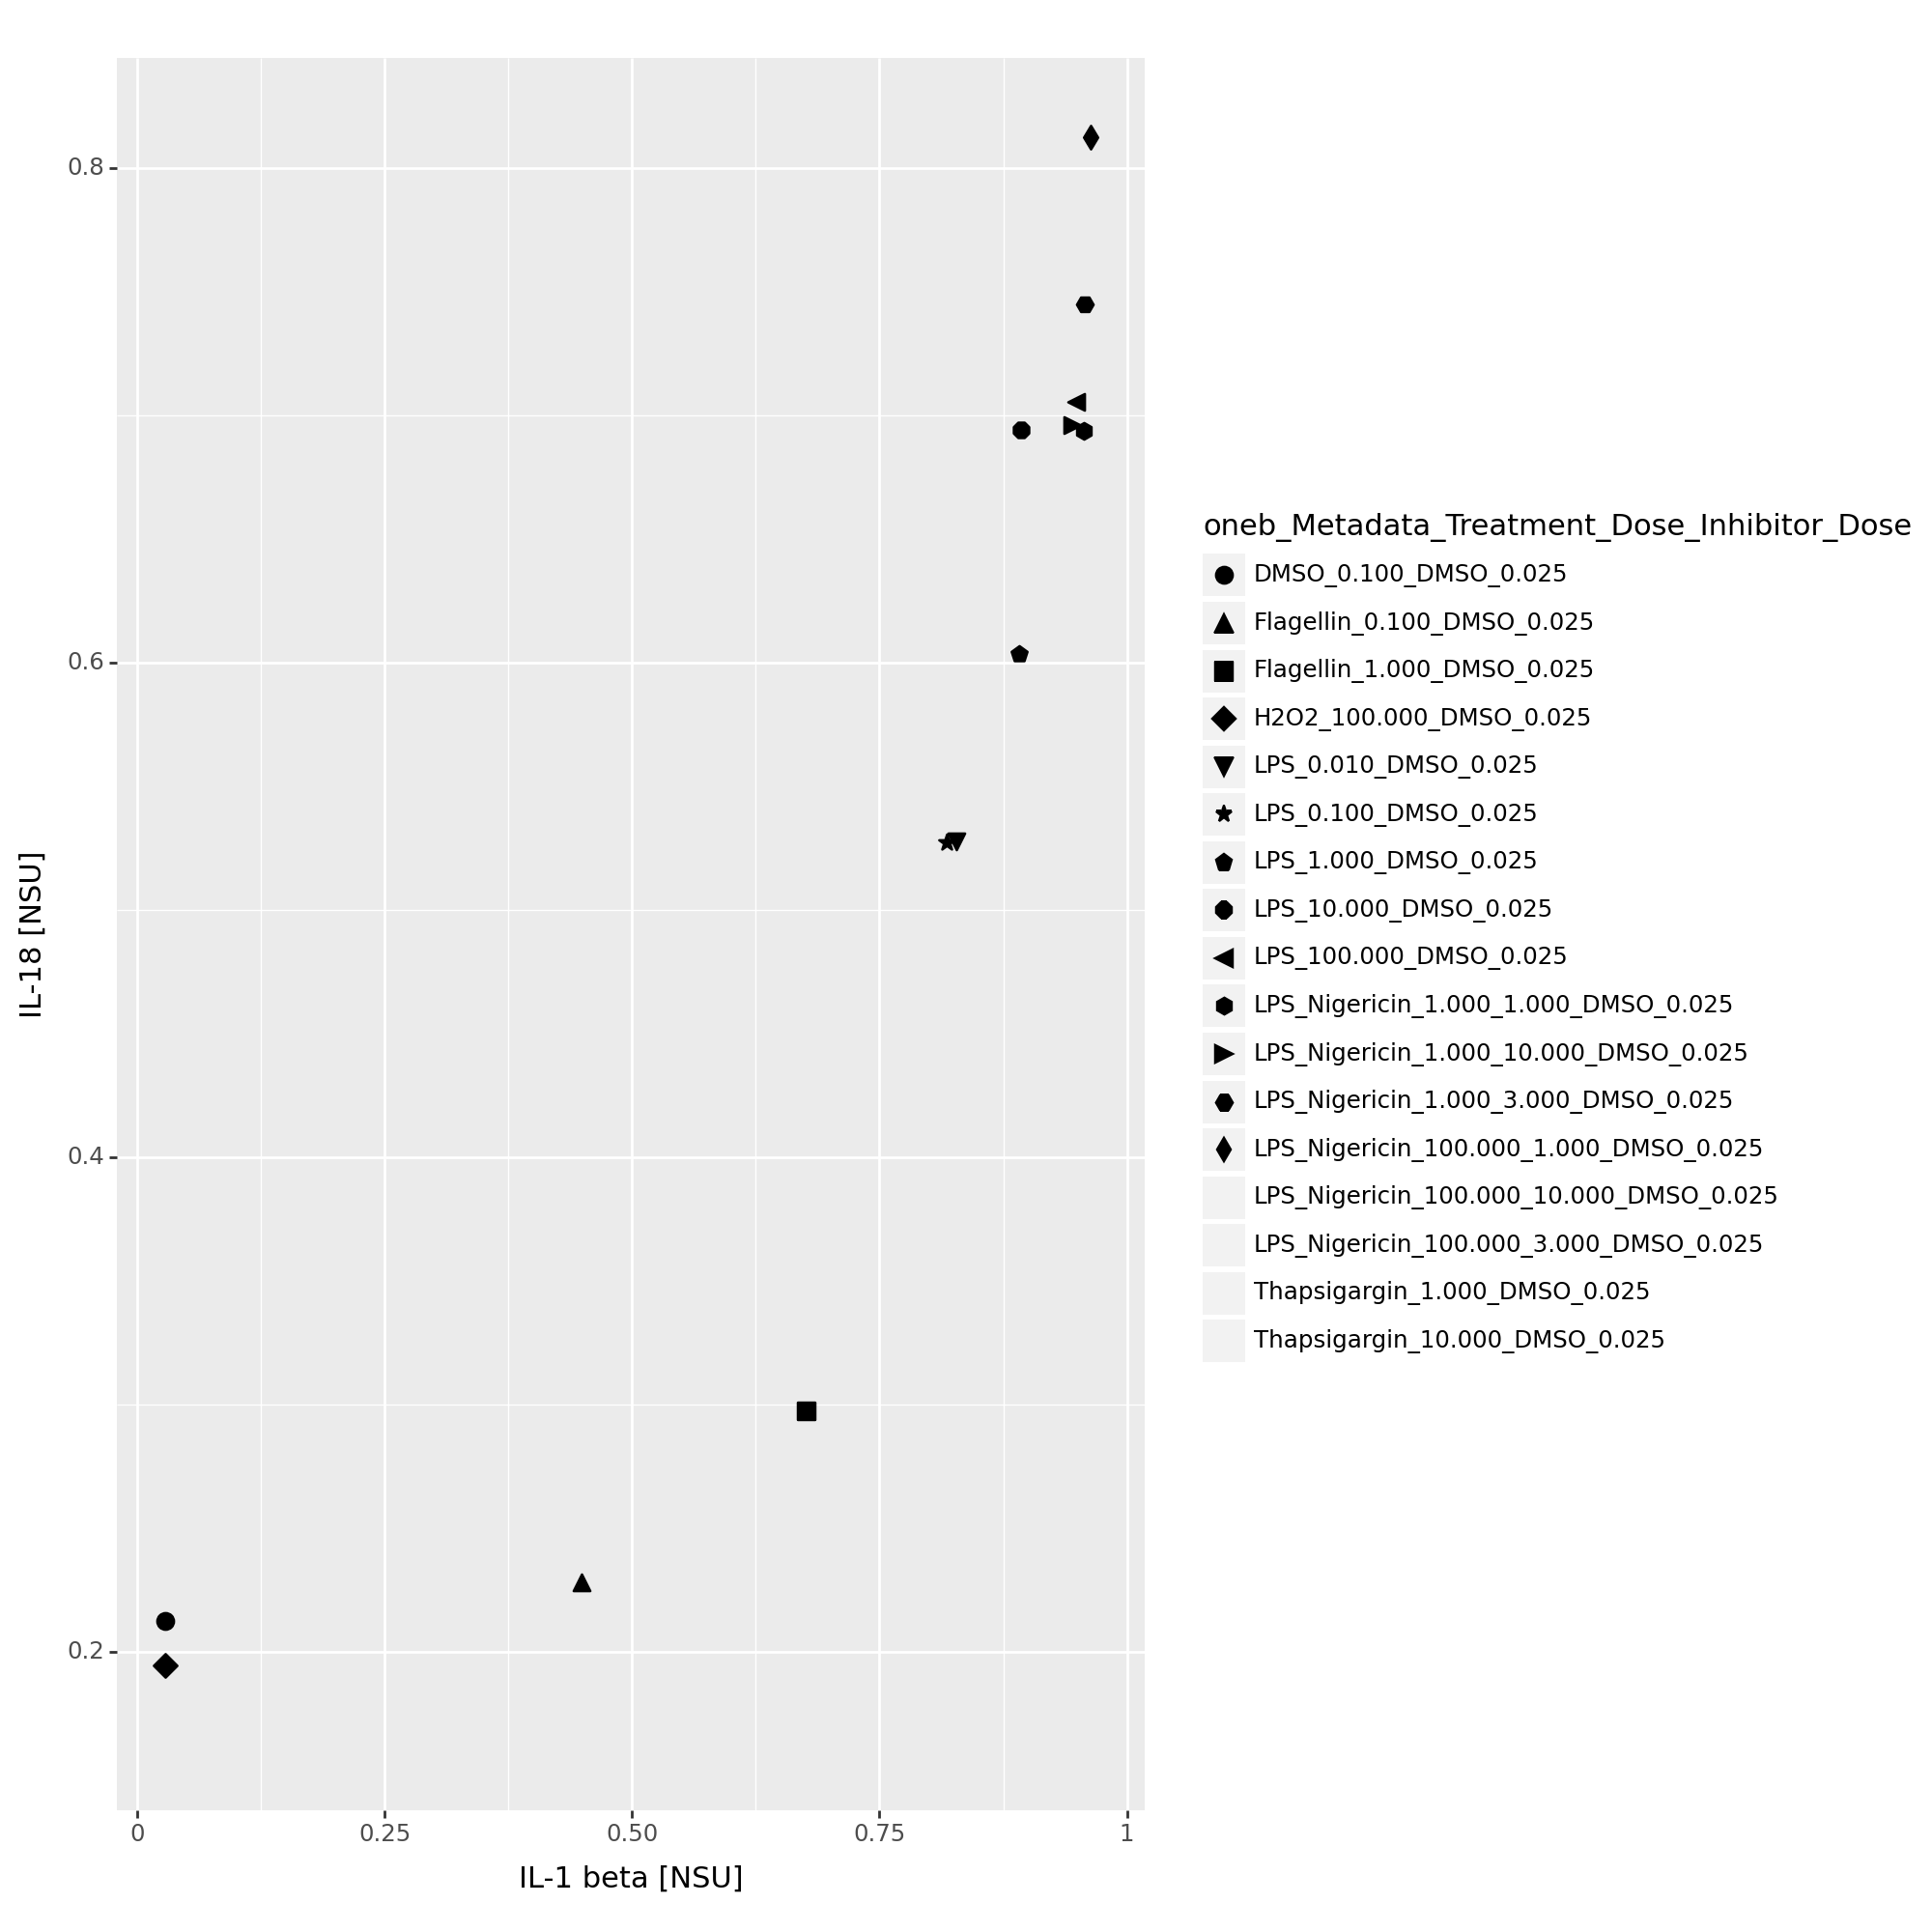

<Figure Size: (1000 x 1000)>

In [62]:
# scatter plot of IL1b and TNFa plotnine make graph big
(
    ggplot(
        df_treatment,
        aes(
            x="IL-1 beta [NSU]",
            y="TNF alpha [NSU]",
            fill="oneb_Metadata_Treatment_Dose_Inhibitor_Dose",
        ),
    )
    + geom_point()
    + theme(figure_size=(10, 10))
)

(
    ggplot(
        df_treatment,
        aes(
            x="IL-1 beta [NSU]",
            y="IL-18 [NSU]",
            shape="oneb_Metadata_Treatment_Dose_Inhibitor_Dose",
        ),
    )
    + geom_point()
    + theme(figure_size=(10, 10))
    + geom_point(size=3)
)